<a href="https://colab.research.google.com/github/PhamTuThanh/Khai_Pha_Du_Lieu/blob/master/Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import scipy.stats as stats

# Đọc dữ liệu từ file Excel
file_path = '/content/babies.xlsx'  # Thay bằng đường dẫn thực tế
df = pd.read_excel(file_path)

# Tách dữ liệu thành hai nhóm: Bà mẹ hút thuốc (smoke = 1) và bà mẹ không hút thuốc (smoke = 0)
smoke_mothers = df[df['smoke'] == 1]['bwt']
non_smoke_mothers = df[df['smoke'] == 0]['bwt']

# Hàm tính các đại lượng thống kê với phần thập phân được làm tròn
def calculate_statistics(data):
    stats = {
        'Số lượng': data.count(),
        'Min': data.min(),
        'Max': data.max(),
        'Mean': round(data.mean(), 2),
        'Sd': round(data.std(), 2),
        'Var': round(data.var(), 2),
        'Median': round(data.median(), 2),
        'Quantile 0%': data.quantile(0),
        'Quantile 25%': round(data.quantile(0.25), 2),
        'Quantile 50%': round(data.quantile(0.5), 2),
        'Quantile 75%': round(data.quantile(0.75), 2),
        'IQR': round(data.quantile(0.75) - data.quantile(0.25), 2),
        'Skewness': round(skew(data), 2),
        'Kurtosis': round(kurtosis(data, fisher=False), 2)  # Fisher=False để tính kurtosis gốc, không trừ 3
    }
    return pd.Series(stats)

# Tính toán các thống kê cho từng nhóm
smoke_stats = calculate_statistics(smoke_mothers)
non_smoke_stats = calculate_statistics(non_smoke_mothers)

# Kết hợp kết quả thành một DataFrame
stats_df = pd.DataFrame({
    'TH1: Bà mẹ hút thuốc': smoke_stats,
    'TH2: Bà mẹ không hút thuốc': non_smoke_stats
})

# Hiển thị bảng thống kê
print("Bảng thống kê cho các trường hợp bà mẹ hút thuốc và không hút thuốc:")
display(stats_df)

Bảng thống kê cho các trường hợp bà mẹ hút thuốc và không hút thuốc:


,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc
Số lượng,484.00,742.00
Min,58.00,55.00
Max,163.00,176.00
Mean,114.11,123.05
Sd,18.10,17.40
Var,327.57,302.71
Median,115.00,123.00
Quantile 0%,58.00,55.00
Quantile 25%,102.00,113.00
Quantile 50%,115.00,123.00


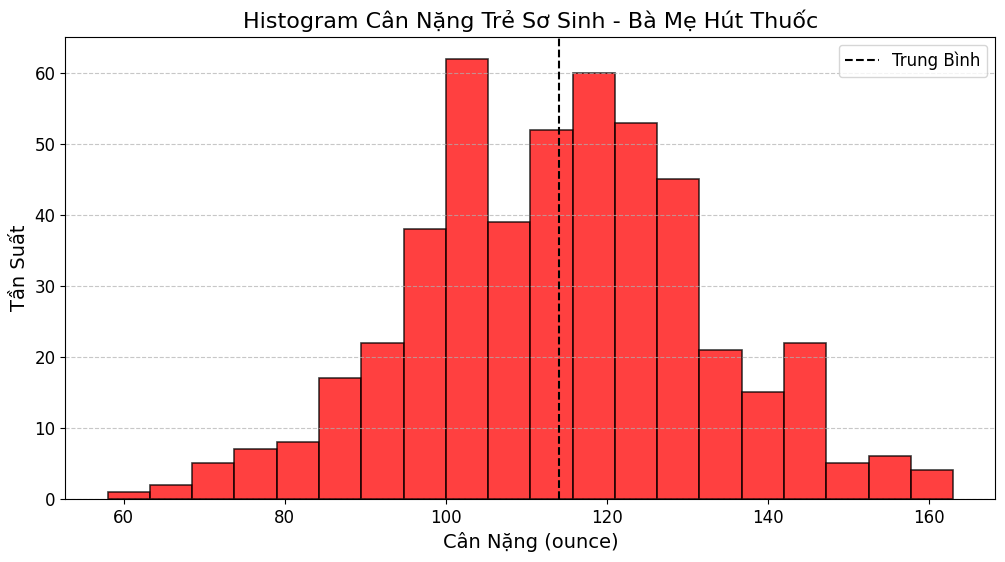

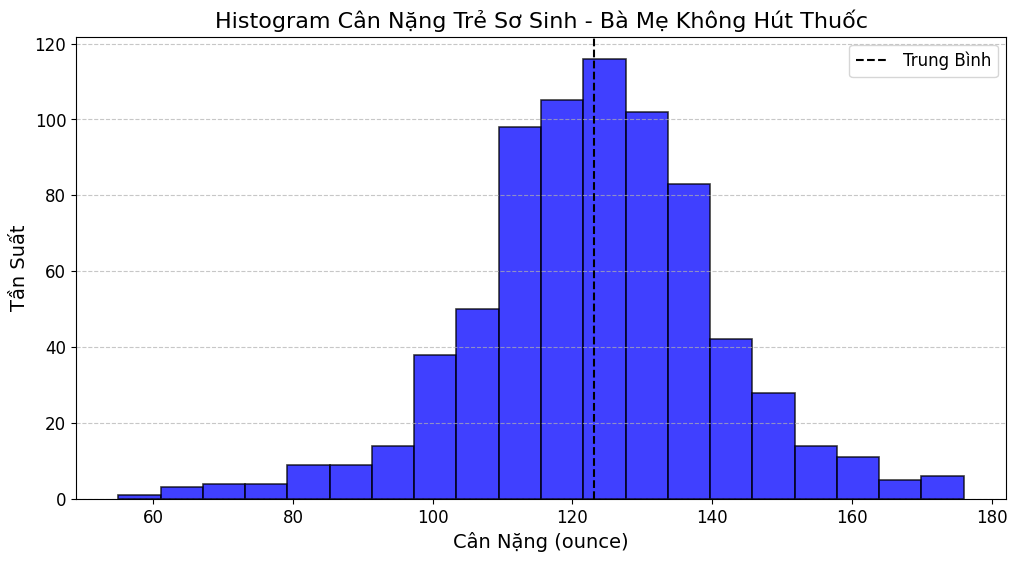

In [5]:
smoke_mothers = df[df['smoke'] == 1]['bwt']
non_smoke_mothers = df[df['smoke'] == 0]['bwt']

# Tạo một hàm để vẽ histogram
def plot_histogram(data, title, color):
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=20, alpha=0.75, color=color, edgecolor='black', linewidth=1.2)
    plt.title(title, fontsize=16)
    plt.xlabel('Cân Nặng (ounce)', fontsize=14)
    plt.ylabel('Tần Suất', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axvline(data.mean(), color='k', linestyle='dashed', linewidth=1.5, label='Trung Bình')
    plt.legend(fontsize=12)
    plt.show()

# Vẽ histogram cho nhóm bà mẹ hút thuốc
plot_histogram(smoke_mothers, 'Histogram Cân Nặng Trẻ Sơ Sinh - Bà Mẹ Hút Thuốc', color='red')

# Vẽ histogram cho nhóm bà mẹ không hút thuốc
plot_histogram(non_smoke_mothers, 'Histogram Cân Nặng Trẻ Sơ Sinh - Bà Mẹ Không Hút Thuốc', color='blue')


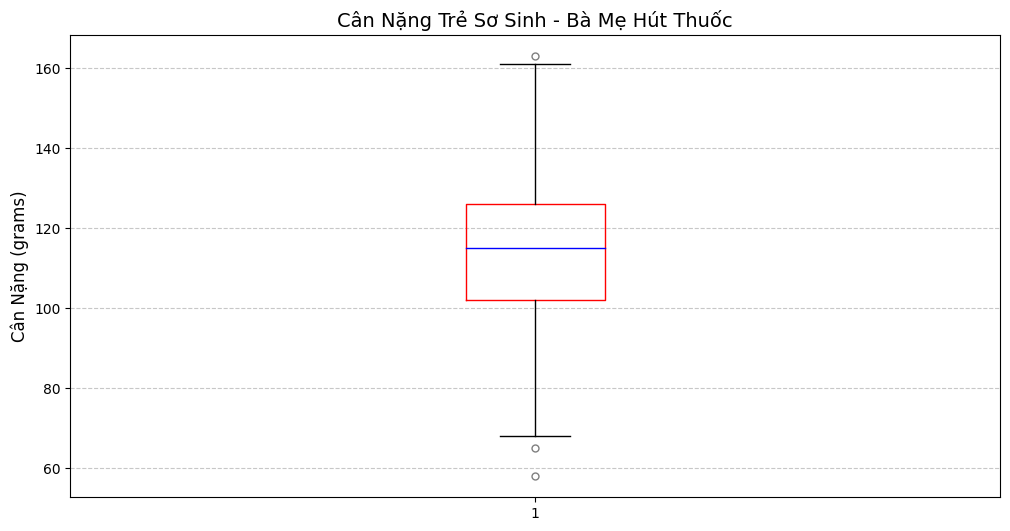

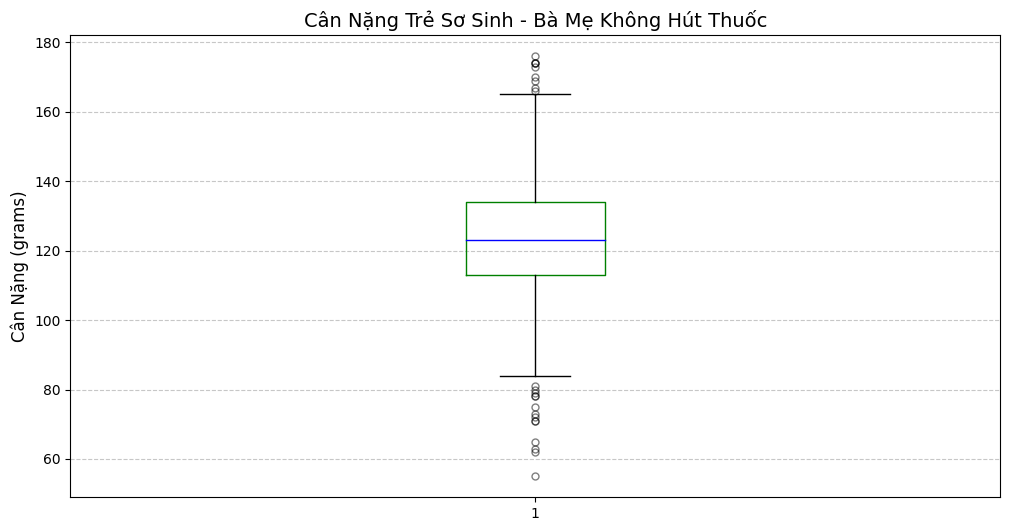

In [6]:
  # Tách dữ liệu thành hai nhóm: Bà mẹ hút thuốc (smoke = 1) và bà mẹ không hút thuốc (smoke = 0)
smoke_mothers = df[df['smoke'] == 1]['bwt']
non_smoke_mothers = df[df['smoke'] == 0]['bwt']

# Tạo boxplot cho Bà mẹ hút thuốc
plt.figure(figsize=(12, 6))
plt.boxplot(smoke_mothers,
            boxprops=dict(color='red'),
            medianprops=dict(color='blue'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='orange', markersize=5, alpha=0.5))

plt.title('Cân Nặng Trẻ Sơ Sinh - Bà Mẹ Hút Thuốc', fontsize=14)
plt.ylabel('Cân Nặng (grams)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ cho Bà mẹ hút thuốc
plt.show()

# Tạo boxplot cho Bà mẹ không hút thuốc
plt.figure(figsize=(12, 6))
plt.boxplot(non_smoke_mothers,
            boxprops=dict(color='green'),
            medianprops=dict(color='blue'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='orange', markersize=5, alpha=0.5))

plt.title('Cân Nặng Trẻ Sơ Sinh - Bà Mẹ Không Hút Thuốc', fontsize=14)
plt.ylabel('Cân Nặng (grams)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ cho Bà mẹ không hút thuốc
plt.show()

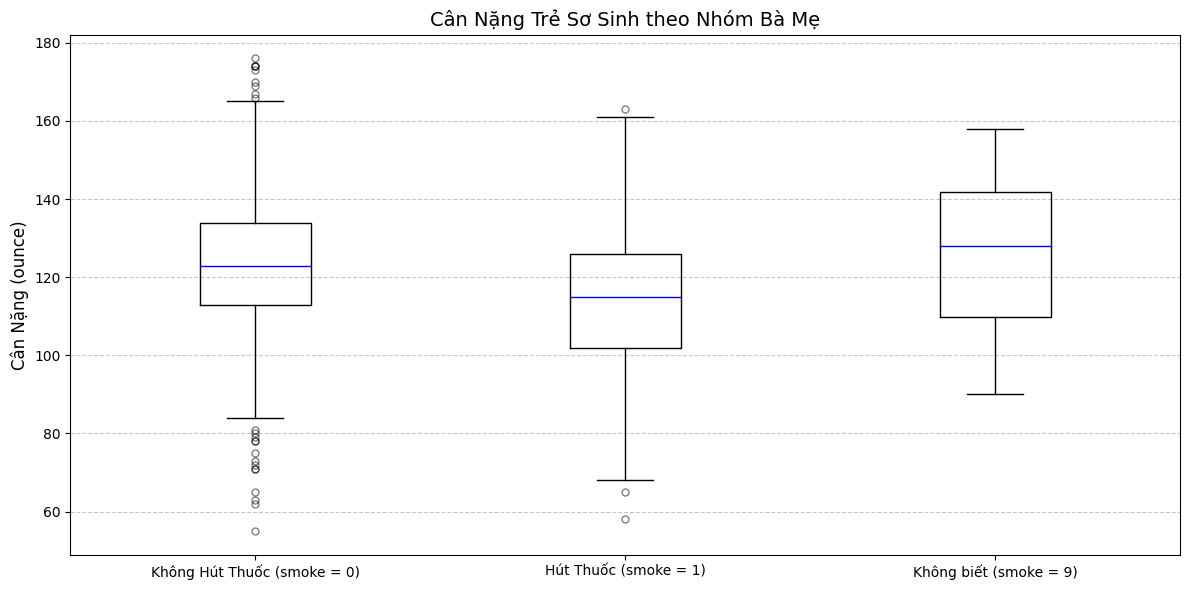

In [7]:
# Tách dữ liệu thành ba nhóm: Bà mẹ không hút thuốc (smoke = 0), Bà mẹ hút thuốc (smoke = 1), và nhóm bổ sung (smoke = 9)
non_smoke_mothers = df[df['smoke'] == 0]['bwt']
smoke_mothers = df[df['smoke'] == 1]['bwt']
other_mothers = df[df['smoke'] == 9]['bwt']  # Nhóm với smoke = 9

# Tạo boxplot cho cả ba nhóm
plt.figure(figsize=(12, 6))
plt.boxplot([non_smoke_mothers, smoke_mothers, other_mothers],
            boxprops=dict(color='black'),
            medianprops=dict(color='blue'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='orange', markersize=5, alpha=0.5))

# Thiết lập tiêu đề và nhãn
plt.title('Cân Nặng Trẻ Sơ Sinh theo Nhóm Bà Mẹ', fontsize=14)
plt.xticks([1, 2, 3], ['Không Hút Thuốc (smoke = 0)', 'Hút Thuốc (smoke = 1)', 'Không biết (smoke = 9)'])
plt.ylabel('Cân Nặng (ounce)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


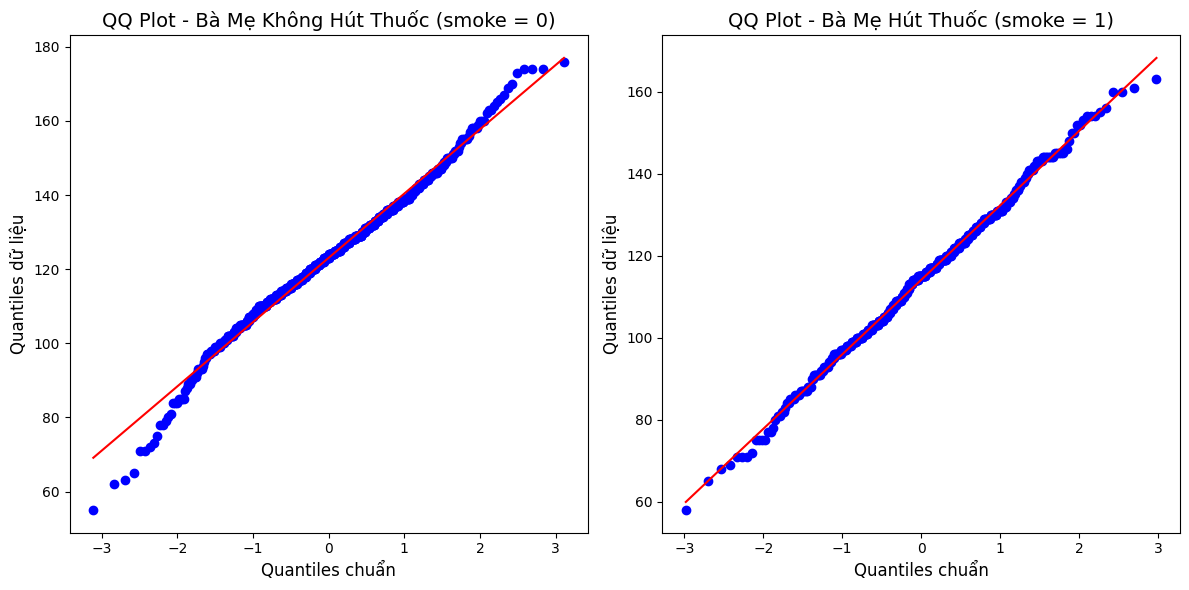

In [8]:
# Tách dữ liệu thành hai nhóm: Bà mẹ hút thuốc (smoke = 1) và bà mẹ không hút thuốc (smoke = 0)
smoke_mothers = df[df['smoke'] == 1]['bwt']
non_smoke_mothers = df[df['smoke'] == 0]['bwt']

# Tạo QQ Plot cho Bà mẹ không hút thuốc (smoke = 0)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Tạo subplot cho nhóm không hút thuốc
stats.probplot(non_smoke_mothers, dist="norm", plot=plt)
plt.title('QQ Plot - Bà Mẹ Không Hút Thuốc (smoke = 0)', fontsize=14)
plt.xlabel('Quantiles chuẩn', fontsize=12)
plt.ylabel('Quantiles dữ liệu', fontsize=12)

# Tạo QQ Plot cho Bà mẹ hút thuốc (smoke = 1)
plt.subplot(1, 2, 2)  # Tạo subplot cho nhóm hút thuốc
stats.probplot(smoke_mothers, dist="norm", plot=plt)
plt.title('QQ Plot - Bà Mẹ Hút Thuốc (smoke = 1)', fontsize=14)
plt.xlabel('Quantiles chuẩn', fontsize=12)
plt.ylabel('Quantiles dữ liệu', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [9]:
# Tách dữ liệu thành hai nhóm: Bà mẹ hút thuốc (smoke = 1) và bà mẹ không hút thuốc (smoke = 0)
smoke_mothers = df[df['smoke'] == 1]['bwt']
non_smoke_mothers = df[df['smoke'] == 0]['bwt']

# Hàm tính các đại lượng thống kê với phần thập phân được làm tròn
def calculate_statistics(data):
    stats = {
        'Skewness': round(skew(data), 2),
        'Kurtosis': round(kurtosis(data, fisher=False), 2)  # Fisher=False để tính kurtosis gốc
    }
    return pd.Series(stats)

# Tính toán các thống kê cho từng nhóm
smoke_stats = calculate_statistics(smoke_mothers)
non_smoke_stats = calculate_statistics(non_smoke_mothers)

# Kết hợp kết quả thành một DataFrame
stats_df = pd.DataFrame({
    'TH1: Bà mẹ hút thuốc': smoke_stats,
    'TH2: Bà mẹ không hút thuốc': non_smoke_stats
})

# Tính sự chênh lệch
diff_stats = stats_df['TH2: Bà mẹ không hút thuốc'] - stats_df['TH1: Bà mẹ hút thuốc']
diff_stats.name = 'Chênh lệch'
stats_df = stats_df.join(diff_stats)

# Hiển thị bảng thống kê
print("Bảng thống kê cho các trường hợp bà mẹ hút thuốc và không hút thuốc:")
display(stats_df)


Bảng thống kê cho các trường hợp bà mẹ hút thuốc và không hút thuốc:


,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc,Chênh lệch
Skewness,-0.03,-0.19,-0.16
Kurtosis,2.99,4.04,1.05
